# MAPK Networks: Compute Numerical Simulation

In [1]:
import scipy as sp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
%config InlineBackend.figure_format = 'svg'

In [2]:
def systemOfEquations(variables, time):
    
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = variables
    
    k1 = 0.02
    k2 = 1
    k3 = 0.01
    k4 = 0.032
    k5 = 1
    k6 = 15
    k7 = 0.045
    k8 = 1
    k9 = 0.092
    k10 = 1
    k11 = 0.01
    k12 = 0.01
    k13 = 1
    k14 = 0.5
    k15 = 0.086
    k16 = 0.0011

    a1 = (k2*x6) + (k15*x11) - (k1*x1*x4) - (k16*x1*x5)
    a2 = (k3*x6) + (k5*x7) + (k10*x9) + (k13*x10) - (x2*x5*(k11 + k12)) - (k4*x2*x4)
    a3 = (k6*x7) + (k8*x8) - (k7*x3*x5)
    a4 = (x6*(k2 + k3)) + (x7*(k5 + k6)) - (k1*x1*x4) - (k4*x2*x4)
    a5 = (k8*x8) + (k10*x9) + (k13*x10) + (k15*x11) - (x2*x5*(k11 + k12)) - (k7*x3*x5) - (k16*x1*x5)
    a6 = (k1*x1*x4) - (x6*(k2 + k3))
    a7 = (k4*x2*x4) - (x7*(k5 + k6))
    a8 = (k7*x3*x5) - (x8*(k8 + k9))
    a9 = (k9*x8) - (k10*x9) + (k11*x2*x5)
    a10 = (k12*x2*x5) - (x10*(k13 + k14))
    a11 = (k14*x10) - (k15*x11) + (k16*x1*x5)

    return [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]

In [3]:
def criteriaCheck1(variables):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = variables
    print(x5 + x8 + x9 + x10 + x11)
    print(x4 + x6 + x7)
    print(x1 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11)
    if (x5 + x8 + x9 + x10 + x11 == 100) and (x4 + x6 + x7 == 50) and (x1 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11 == 200):
        return True 
    else:
        return False


In [4]:
def criteriaCheck2(variables):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = variables
    print(x5 + x8 + x9 + x10 + x11)
    print(x4 + x6 + x7)
    print(x1 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11)
    if (x5 + x8 + x9 + x10 + x11 == 100) and (x4 + x6 + x7 == 50) and (x1 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11 == 500):
        return True 
    else:
        return False


In [5]:
def createPlotsTask7N8(solution, t):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=360)
    axes.plot(t, solution[:, 0], "black",
              t, solution[:, 1], "green",
              t, solution[:, 2], "red",
              t, solution[:, 3], "cyan",
              t, solution[:, 4], "magenta",
              t, solution[:, 5], "yellow",
              t, solution[:, 6], "blue",
              t, solution[:, 7], "silver",
              t, solution[:, 8], "gold",
              t, solution[:, 9], "indigo",
              t, solution[:, 10], "brown")
    plt.title("MAPK Cascade")
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    #plt.show()
    

In [6]:
def evaluateTrajectories(solution, t):
    eval1 = solution[:, 0] + solution[:, 1] + solution[:, 2] + solution[:, 3] + solution[:, 4]
    eval2 = solution[:, 4] + solution[:, 7] + solution[:, 8] + solution[:, 9] + solution[:, 10]
    eval3 = solution[:, 3] + solution[:, 5] + solution[:, 6]
    eval4 = solution[:, 0] + solution[:, 1] + solution[:, 2] + solution[:, 5] + solution[:, 6] + solution[:, 7] + solution[:, 8] + solution[:, 9] + solution[:, 10]
    eval5 = solution[:, 0] + solution[:, 1] + solution[:, 2] + solution[:, 3] + solution[:, 4] + solution[:, 5] + solution[:, 6] + solution[:, 7] + solution[:, 8] + solution[:, 9] + solution[:, 10]
    figeval, axeseval = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=360)
    axeseval.plot(t, eval1, "b",t, eval2, "g",t, eval3, "r",t, eval4, "c",t, eval5, "m")
    plt.title("MAPK Cascade")
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    #plt.show()

In [7]:
def plotGraphsForTask7(initialCondition):
    if criteriaCheck1(initialCondition) == True:
        t_start = 0
        t_end = 7000
        t_step = 100000
        t = np.linspace(t_start, t_end, t_step)
        solution = integrate.odeint(systemOfEquations, initialCondition, t)
        createPlotsTask7N8(solution, t)
        evaluateTrajectories(solution,t)
    else:
        print("Wrong set of inputs")

In [8]:
def plotGraphsForTask8(initialCondition):
    if criteriaCheck2(initialCondition) == True:
        t_start = 0
        t_end = 7000
        t_step = 100000
        t = np.linspace(t_start, t_end, t_step)
        solution = integrate.odeint(systemOfEquations, initialCondition, t)
        createPlotsTask7N8(solution, t)
        evaluateTrajectories(solution,t)
    else:
        print("Wrong set of inputs")

## Task 7

100
50
200


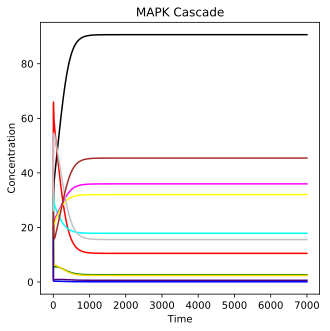

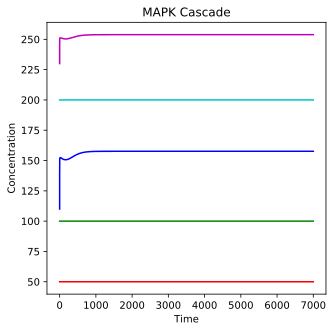

In [9]:
#Initial condition
initialCondition = [20, 30, 30, 10, 20, 20, 20, 20, 20, 20, 20]
plotGraphsForTask7(initialCondition)

100
50
200


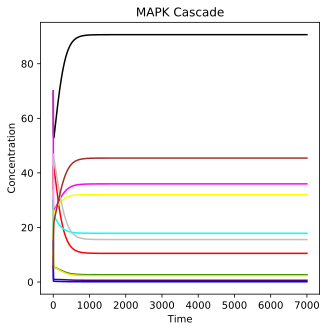

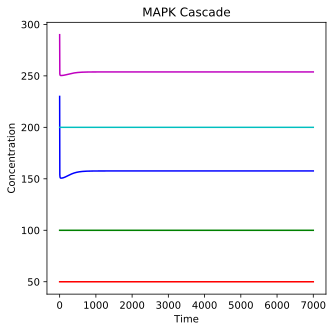

In [10]:
#Initial condition
initialCondition = [70, 30, 40, 20, 70, 15, 15, 10, 10, 5, 5]
plotGraphsForTask7(initialCondition)

In [11]:
#Initial condition
initialCondition = [4,16,10,20,30,40,60,10,10,20,30]
plotGraphsForTask7(initialCondition)

100
120
200
Wrong set of inputs


### Task 8

In [12]:
#Initial condition
initialCondition = [120, 120, 140, 20, 20, 20, 20, 10, 10, 30, 30]
plotGraphsForTask8(initialCondition)

100
60
500
Wrong set of inputs


100
50
500


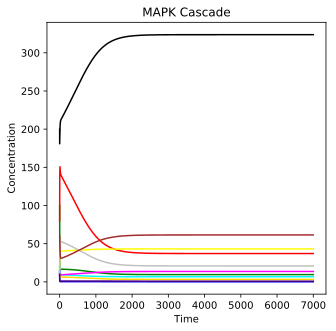

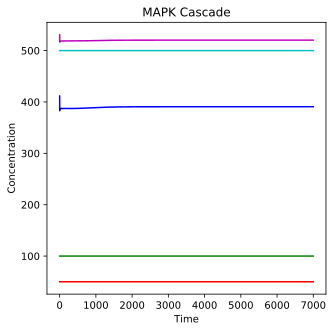

In [13]:
#Initial condition
initialCondition = [200, 100, 80, 20, 10, 15, 15, 10, 10, 10, 60]
plotGraphsForTask8(initialCondition)

100
50
500


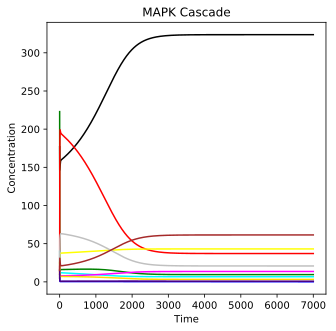

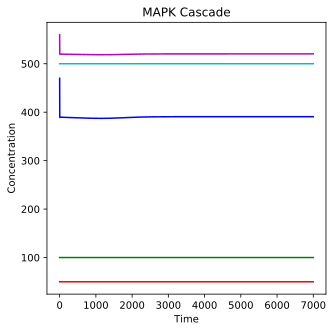

In [14]:
#Initial condition
initialCondition = [177, 223, 10, 40, 20, 5, 5, 25, 25, 15, 15]
plotGraphsForTask8(initialCondition)

### Bertini

In [2]:
def parserBertiniOutput(file):
    lines = (line.strip() for line in file)
    nvariables = next(lines)
    dimensionSolution = int(nvariables[21:])
    variables = next(lines)
    rank = next(lines)
    skip1 = next(lines)
    dimensionTitle = next(lines)
    skip2 = next(lines)
    nonSingularTitle = next(lines)
    curline = next(lines)
    results = []
    while curline == '---------------':
        pathNumber = next(lines)
        componentNumber = next(lines)
        estimatedConditionNumber = next(lines)
        components = []
        for i in range(dimensionSolution):
            component = next(lines)
            real, imaginary = component.split(' ')
            component = float(real) + 1j * float(imaginary)
            components.append(component)
        results.append(components)
        multiplicity = next(lines)
        deflations = next(lines)
        curline = next(lines)
    return results

In [3]:
def modifiedResults(results, atol=1e-08):
    reducedResults = []
    for result in results:
        arrayForm = np.array(result)
        real = np.real(arrayForm)
        imaginary = np.imag(arrayForm)
        if np.allclose(np.zeros(shape=imaginary.shape), imaginary, atol=atol) and np.all(real >= 0):            
            reducedResults.append(real)        
    return np.array(reducedResults)

In [4]:
#INPUT file for Bertini
bertiniInputFile = """
CONFIG
TRACKTYPE: 1;
INPUT
function y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14;
variable_group x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11;
constant k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19;

k1 = 0.02;
k2 = 1;
k3 = 0.01;
k4 = 0.032;
k5 = 1;
k6 = 15;
k7 = 0.045;
k8 = 1;
k9 = 0.092;
k10 = 1;
k11 = 0.01;
k12 = 0.01;
k13 = 1;
k14 = 0.5;
k15 = 0.086;
k16 = 0.0011;

k17 = 100;
k18 = 50;
k19 = {};

y1 = k2 * x6 + k15 * x11 - k1 * x1 * x4 - k16 * x1 * x5;
y2 = k3 * x6 + k5 * x7 + k10 * x9 + k13 * x10 - x2 * x5 * (k11 + k12) - k4 * x2 * x4;
y3 = k6 * x7 + k8 * x8 - k7 * x3 * x5;
y4 = x6 * (k2 + k3) + x7 * (k5 + k6) - k1 * x1 * x4 - k4 * x2 * x4;
y5 = k8 * x8 + k10 * x9 + k13 * x10 + k15 * x11 - x2 * x5 * (k11 + k12) - k7 * x3 * x5 - k16 * x1 * x5; 
y6 = k1 * x1 * x4 - x6 * (k2 + k3);
y7 = k4 * x2 * x4 - x7 * (k5 + k6);
y8 = k7 * x3 * x5 - x8 * (k8 + k9);
y9 = k9 * x8 - k10 * x9 + k11 * x2 * x5;
y10 = k12 * x2 * x5 - x10 * (k13 + k14);
y11 = k14 * x10 - k15 * x11 + k16 * x1 * x5;

y12 = x5 - k17 + x8 + x9 + x10 + x11;
y13 = x4 - k18 + x6 + x7;
y14 = x1 - k19 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11;

END;
"""

In [5]:
def computation(value, pathForData, subfolderPath):
    subfolder = os.path.join(pathForData, subfolderPath.format(0))
    if not os.path.exists(subfolder):
        os.mkdir(subfolder)
    os.chdir(subfolder)
    with open(os.path.join(subfolder, 'input'), 'w') as file:
        writeData = bertiniInputFile.format(value)
        file.write(writeData)
    subprocess.call(['/home/icxa/Documents/Software/BertiniLinux64_v1.5.1/./bertini'])
    with open(os.path.join(subfolder, 'main_data')) as file:
        data = parserBertiniOutput(file)
        solNum = len(modifiedResults(data))
    return solNum

In [6]:
pathForData = os.path.abspath('/home/icxa/Documents/LabTasks5-16March/Data1')
if not os.path.exists(pathForData):
    os.mkdir(pathForData)
subfolderPath = 'input{:04}/'

In [7]:
k19PossibleValues = [200, 500]
for value in k19PossibleValues:
    solNum = computation(value, pathForData, subfolderPath)
    print("For k19 as ", value, "number of positive real solutions are:", solNum)

For k19 as  200 number of positive real solutions are: 1
For k19 as  500 number of positive real solutions are: 3


### Varying K19 values upto one digit of accuracy 

In [29]:
lowerBound = 200
upperBound = 501
interval = 1
possibleValues = np.arange(lowerBound, upperBound, interval)

In [30]:
print(len(possibleValues))

301


In [31]:
print(possibleValues)

[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444 445 44

In [32]:
pathForData = os.path.abspath('/home/icxa/Documents/LabTasks5-16March/Data2')
if not os.path.exists(pathForData):
    os.mkdir(pathForData)
subfolderPath = 'input{:04}/'

In [33]:
results = []
for value in possibleValues:
    solNum = computation(value, pathForData, subfolderPath)
    results.append((value, solNum))

In [34]:
print(results)

[(200, 1), (201, 1), (202, 1), (203, 0), (204, 1), (205, 1), (206, 1), (207, 1), (208, 1), (209, 1), (210, 1), (211, 1), (212, 1), (213, 1), (214, 1), (215, 1), (216, 1), (217, 1), (218, 0), (219, 1), (220, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (227, 1), (228, 1), (229, 1), (230, 1), (231, 0), (232, 1), (233, 1), (234, 1), (235, 1), (236, 1), (237, 1), (238, 1), (239, 1), (240, 1), (241, 1), (242, 1), (243, 1), (244, 1), (245, 1), (246, 1), (247, 1), (248, 1), (249, 1), (250, 1), (251, 1), (252, 1), (253, 1), (254, 1), (255, 1), (256, 1), (257, 1), (258, 1), (259, 1), (260, 1), (261, 1), (262, 1), (263, 1), (264, 1), (265, 1), (266, 1), (267, 1), (268, 1), (269, 1), (270, 1), (271, 0), (272, 1), (273, 1), (274, 1), (275, 1), (276, 1), (277, 1), (278, 1), (279, 1), (280, 1), (281, 1), (282, 1), (283, 1), (284, 1), (285, 1), (286, 1), (287, 1), (288, 1), (289, 1), (290, 1), (291, 1), (292, 1), (293, 1), (294, 1), (295, 1), (296, 1), (297, 1), (298, 1), (299, 1),

In [35]:
for i in range(len(results)):
    value1, solNum1 = results[i]
    for j in range(i, len(results)):
        value2, solNum2 = results[j]
        if solNum1 == 1 and solNum2 == 3 and value2-value1 == 1:
            print(value1, solNum1, value2, solNum2)
            break

409 1 410 3
426 1 427 3
463 1 464 3
489 1 490 3


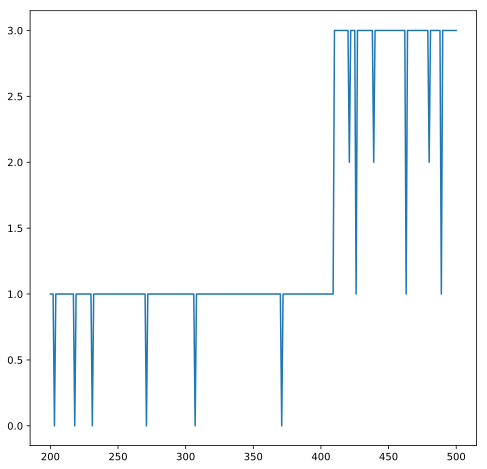

In [37]:
x, y = zip(*results)
fig, axes = plt.subplots(1,1, figsize=(8, 8))
plt.plot(x, y)
plt.show()

### Varying K19 values upto one decimal digit of accuracy 

In [10]:
lowerBound = 200.0
upperBound = 500.1
interval = 0.1
possibleValues = np.arange(lowerBound, upperBound, interval)

In [11]:
print(len(possibleValues))

3001


In [12]:
print(possibleValues)

[ 200.   200.1  200.2 ...,  499.8  499.9  500. ]


In [13]:
pathForData = os.path.abspath('/home/icxa/Documents/LabTasks5-16March/Data4')
if not os.path.exists(pathForData):
    os.mkdir(pathForData)
subfolderPath = 'input{:04}/'

In [14]:
results = []
for value in possibleValues:
    solNum = computation(value, pathForData, subfolderPath)
    results.append((value, solNum))

In [15]:
print(results)

[(200.0, 1), (200.09999999999999, 1), (200.19999999999999, 1), (200.29999999999998, 1), (200.39999999999998, 1), (200.49999999999997, 1), (200.59999999999997, 1), (200.69999999999996, 1), (200.79999999999995, 1), (200.89999999999995, 1), (200.99999999999994, 1), (201.09999999999994, 1), (201.19999999999993, 1), (201.29999999999993, 1), (201.39999999999992, 1), (201.49999999999991, 1), (201.59999999999991, 0), (201.6999999999999, 1), (201.7999999999999, 1), (201.89999999999989, 1), (201.99999999999989, 1), (202.09999999999988, 1), (202.19999999999987, 1), (202.29999999999987, 1), (202.39999999999986, 1), (202.49999999999986, 1), (202.59999999999985, 1), (202.69999999999985, 1), (202.79999999999984, 1), (202.89999999999984, 1), (202.99999999999983, 1), (203.09999999999982, 1), (203.19999999999982, 1), (203.29999999999981, 1), (203.39999999999981, 1), (203.4999999999998, 1), (203.5999999999998, 1), (203.69999999999979, 1), (203.79999999999978, 1), (203.89999999999978, 1), (203.99999999999

In [19]:
for i in range(len(results)):
    value1, solNum1 = results[i]
    for j in range(i, len(results)):
        value2, solNum2 = results[j]
        if solNum1 == 1 and solNum2 == 3 and value2-value1 < 0.2:
            print(value1, solNum1, value2, solNum2)
            break

409.2 1 409.3 3
413.3 1 413.4 3
415.4 1 415.5 3
429.5 1 429.6 3
441.0 1 441.1 3
445.3 1 445.4 3
455.0 1 455.2 3
455.1 1 455.2 3
463.0 1 463.1 3
464.8 1 464.9 3
480.8 1 480.9 3
484.5 1 484.6 3
491.6 1 491.7 3
495.1 1 495.2 3


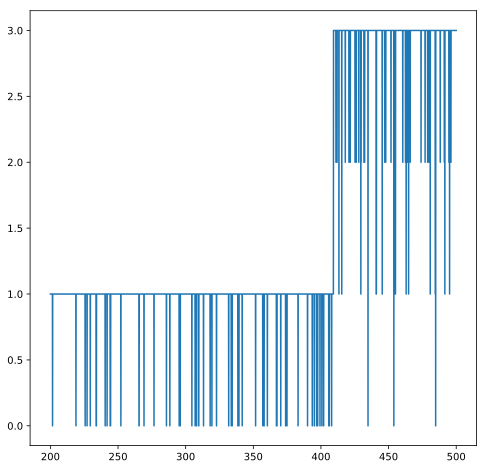

In [20]:
x, y = zip(*results)
fig, axes = plt.subplots(1,1, figsize=(8, 8))
plt.plot(x, y)
plt.show()

## Varying K17 in 2 orders of magnitude

In [38]:
lowerBound = 0
upperBound = 1001
interval = 1
possibleValuesK17 = list(np.arange(lowerBound, upperBound, interval))

In [39]:
print(possibleValuesK17)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [40]:
possibleValuesK19 = [200,500]

In [41]:
possibleVariations = [(k17, k19) for k17 in possibleValuesK17 for k19 in possibleValuesK19]

In [42]:
print(possibleVariations)

[(0, 200), (0, 500), (1, 200), (1, 500), (2, 200), (2, 500), (3, 200), (3, 500), (4, 200), (4, 500), (5, 200), (5, 500), (6, 200), (6, 500), (7, 200), (7, 500), (8, 200), (8, 500), (9, 200), (9, 500), (10, 200), (10, 500), (11, 200), (11, 500), (12, 200), (12, 500), (13, 200), (13, 500), (14, 200), (14, 500), (15, 200), (15, 500), (16, 200), (16, 500), (17, 200), (17, 500), (18, 200), (18, 500), (19, 200), (19, 500), (20, 200), (20, 500), (21, 200), (21, 500), (22, 200), (22, 500), (23, 200), (23, 500), (24, 200), (24, 500), (25, 200), (25, 500), (26, 200), (26, 500), (27, 200), (27, 500), (28, 200), (28, 500), (29, 200), (29, 500), (30, 200), (30, 500), (31, 200), (31, 500), (32, 200), (32, 500), (33, 200), (33, 500), (34, 200), (34, 500), (35, 200), (35, 500), (36, 200), (36, 500), (37, 200), (37, 500), (38, 200), (38, 500), (39, 200), (39, 500), (40, 200), (40, 500), (41, 200), (41, 500), (42, 200), (42, 500), (43, 200), (43, 500), (44, 200), (44, 500), (45, 200), (45, 500), (46, 20

In [43]:
#INPUT file for Bertini
bertiniInputFileT10 = """
CONFIG
TRACKTYPE: 1;
INPUT
function y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14;
variable_group x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11;
constant k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19;

k1 = 0.02;
k2 = 1;
k3 = 0.01;
k4 = 0.032;
k5 = 1;
k6 = 15;
k7 = 0.045;
k8 = 1;
k9 = 0.092;
k10 = 1;
k11 = 0.01;
k12 = 0.01;
k13 = 1;
k14 = 0.5;
k15 = 0.086;
k16 = 0.0011;

k17 = {};
k18 = 50;
k19 = {};

y1 = k2 * x6 + k15 * x11 - k1 * x1 * x4 - k16 * x1 * x5;
y2 = k3 * x6 + k5 * x7 + k10 * x9 + k13 * x10 - x2 * x5 * (k11 + k12) - k4 * x2 * x4;
y3 = k6 * x7 + k8 * x8 - k7 * x3 * x5;
y4 = x6 * (k2 + k3) + x7 * (k5 + k6) - k1 * x1 * x4 - k4 * x2 * x4;
y5 = k8 * x8 + k10 * x9 + k13 * x10 + k15 * x11 - x2 * x5 * (k11 + k12) - k7 * x3 * x5 - k16 * x1 * x5; 
y6 = k1 * x1 * x4 - x6 * (k2 + k3);
y7 = k4 * x2 * x4 - x7 * (k5 + k6);
y8 = k7 * x3 * x5 - x8 * (k8 + k9);
y9 = k9 * x8 - k10 * x9 + k11 * x2 * x5;
y10 = k12 * x2 * x5 - x10 * (k13 + k14);
y11 = k14 * x10 - k15 * x11 + k16 * x1 * x5;

y12 = x5 - k17 + x8 + x9 + x10 + x11;
y13 = x4 - k18 + x6 + x7;
y14 = x1 - k19 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11;

END;
"""

In [44]:
def computationT10(value, pathForData, subfolderPath):
    subfolder = os.path.join(pathForData, subfolderPath.format(0))
    if not os.path.exists(subfolder):
        os.mkdir(subfolder)
    os.chdir(subfolder)
    with open(os.path.join(subfolder, 'input'), 'w') as file:
        writeData = bertiniInputFileT10.format(*value)
        file.write(writeData)
    subprocess.call(['/home/icxa/Documents/Software/BertiniLinux64_v1.5.1/./bertini'])
    with open(os.path.join(subfolder, 'main_data')) as file:
        data = parserBertiniOutput(file)
        solNum = len(modifiedResults(data))
    return solNum

In [45]:
pathForData = os.path.abspath('/home/icxa/Documents/LabTasks5-16March/Data3')
if not os.path.exists(pathForData):
    os.mkdir(pathForData)
subfolderPath = 'inputFolder/'

In [46]:
results = []
for value in possibleVariations:
    solNum = computationT10(value, pathForData, subfolderPath)
    results.append((value[0], value[1], solNum))

In [47]:
print(results)

[(0, 200, 0), (0, 500, 0), (1, 200, 1), (1, 500, 1), (2, 200, 1), (2, 500, 1), (3, 200, 1), (3, 500, 1), (4, 200, 1), (4, 500, 1), (5, 200, 1), (5, 500, 1), (6, 200, 1), (6, 500, 1), (7, 200, 1), (7, 500, 1), (8, 200, 1), (8, 500, 1), (9, 200, 1), (9, 500, 1), (10, 200, 1), (10, 500, 1), (11, 200, 1), (11, 500, 1), (12, 200, 1), (12, 500, 1), (13, 200, 1), (13, 500, 1), (14, 200, 1), (14, 500, 1), (15, 200, 1), (15, 500, 1), (16, 200, 1), (16, 500, 1), (17, 200, 1), (17, 500, 1), (18, 200, 1), (18, 500, 1), (19, 200, 1), (19, 500, 1), (20, 200, 1), (20, 500, 1), (21, 200, 1), (21, 500, 1), (22, 200, 1), (22, 500, 1), (23, 200, 1), (23, 500, 1), (24, 200, 1), (24, 500, 1), (25, 200, 1), (25, 500, 1), (26, 200, 1), (26, 500, 1), (27, 200, 1), (27, 500, 1), (28, 200, 1), (28, 500, 1), (29, 200, 1), (29, 500, 1), (30, 200, 1), (30, 500, 1), (31, 200, 1), (31, 500, 1), (32, 200, 1), (32, 500, 1), (33, 200, 1), (33, 500, 1), (34, 200, 1), (34, 500, 1), (35, 200, 1), (35, 500, 1), (36, 200, 1

In [49]:
x, y, z = zip(*results)
print(x,y,z)

(0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121,

In [52]:
storeV1k17 = []
storeV1numSol = []
storeV2k17 = []
storeV2numSol = []
for i in range(len(results)):
    k17 = results[i][0]
    k19 = results[i][1]
    numSol = results[i][2]
    if k19 == 500:
        storeV1k17.append(k17)
        storeV1numSol.append(numSol)
    elif k19 == 200:
        storeV2k17.append(k17)
        storeV2numSol.append(numSol)
print(len(storeV1k17))
print(len(storeV2k17))

1001
1001


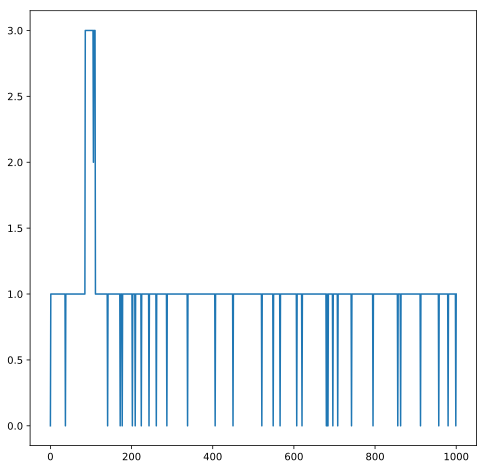

In [55]:
fig, axes = plt.subplots(1,1, figsize=(8, 8))
plt.plot(storeV1k17, storeV1numSol)
plt.show()

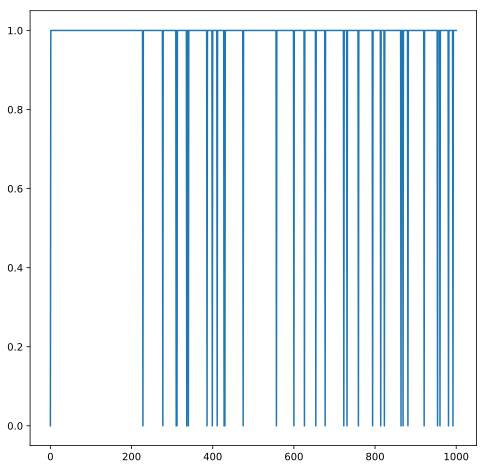

In [56]:
fig, axes = plt.subplots(1,1, figsize=(8, 8))
plt.plot(storeV2k17, storeV2numSol)
plt.show()